
# Notebook de Ingestão de Dados - Camada Bronze

Este notebook tem como objetivo realizar a ingestão de dados para a camada bronze, responsável por armazenar os dados brutos provenientes das fontes originais. Os dados adicionados neste processo são provenientes do portal de transparência do governo federal.

Serão armazenados dois conjuntos de dados:
- As emendas parlamentares, referentes aos anos de 2023 até 2025, que foram adicionadas diretamente pelo carregamento de um arquivo CSV.
- Os parlamentares em exercício de 2023 a 2026, obtidos via requisições e ingeridos neste notebook.

# Configuração do Ambiente

## Carregando bibliotecas

In [0]:
import requests
from PIL import Image
from IPython.display import display

## Criando Schema Bronze

In [0]:
spark.sql("CREATE SCHEMA IF NOT EXISTS bronze")

DataFrame[]

# Criando tabelas com os dados

## Parlamentares

In [0]:
# Url para requisição de deputados em exercício
url = "https://dadosabertos.camara.leg.br/api/v2/deputados"

# Pegando todos os deputados em exercício (mandato atual)
params = {
    "ordem": "ASC",
    "ordenarPor": "nome",
    "pagina": 1,
    "itens": 100
}

todos = []
while True:
    resp = requests.get(url, params=params)
    resp.raise_for_status()

    dados = resp.json()["dados"]
    todos.extend(dados)

    # Verifica se acabou a paginação
    if "links" in resp.json():
        next_link = [lnk for lnk in resp.json()["links"] if lnk["rel"] == "next"]
        if next_link:
            params["pagina"] += 1
        else:
            break
    else:
        break

# Converter JSON para Spark DataFrame
df = spark.createDataFrame(todos)

# Gravar no bronze (Delta)
df.write \
  .format("delta") \
  .mode("overwrite") \
  .saveAsTable("bronze.parlamentares")


In [0]:
df.display()

email,id,idLegislatura,nome,siglaPartido,siglaUf,uri,uriPartido,urlFoto
dep.acaciofavacho@camara.leg.br,204379,57,Acácio Favacho,MDB,AP,https://dadosabertos.camara.leg.br/api/v2/deputados/204379,https://dadosabertos.camara.leg.br/api/v2/partidos/36899,https://www.camara.leg.br/internet/deputado/bandep/204379.jpg
dep.adailfilho@camara.leg.br,220714,57,Adail Filho,REPUBLICANOS,AM,https://dadosabertos.camara.leg.br/api/v2/deputados/220714,https://dadosabertos.camara.leg.br/api/v2/partidos/37908,https://www.camara.leg.br/internet/deputado/bandep/220714.jpg
dep.adolfoviana@camara.leg.br,204560,57,Adolfo Viana,PSDB,BA,https://dadosabertos.camara.leg.br/api/v2/deputados/204560,https://dadosabertos.camara.leg.br/api/v2/partidos/36835,https://www.camara.leg.br/internet/deputado/bandep/204560.jpg
dep.adrianaventura@camara.leg.br,204528,57,Adriana Ventura,NOVO,SP,https://dadosabertos.camara.leg.br/api/v2/deputados/204528,https://dadosabertos.camara.leg.br/api/v2/partidos/37901,https://www.camara.leg.br/internet/deputado/bandep/204528.jpg
dep.adrianodobaldy@camara.leg.br,121948,57,Adriano do Baldy,PP,GO,https://dadosabertos.camara.leg.br/api/v2/deputados/121948,https://dadosabertos.camara.leg.br/api/v2/partidos/37903,https://www.camara.leg.br/internet/deputado/bandep/121948.jpg
dep.aecioneves@camara.leg.br,74646,57,Aécio Neves,PSDB,MG,https://dadosabertos.camara.leg.br/api/v2/deputados/74646,https://dadosabertos.camara.leg.br/api/v2/partidos/36835,https://www.camara.leg.br/internet/deputado/bandep/74646.jpg
dep.afonsohamm@camara.leg.br,136811,57,Afonso Hamm,PP,RS,https://dadosabertos.camara.leg.br/api/v2/deputados/136811,https://dadosabertos.camara.leg.br/api/v2/partidos/37903,https://www.camara.leg.br/internet/deputado/bandep/136811.jpg
dep.afonsomotta@camara.leg.br,178835,57,Afonso Motta,PDT,RS,https://dadosabertos.camara.leg.br/api/v2/deputados/178835,https://dadosabertos.camara.leg.br/api/v2/partidos/36786,https://www.camara.leg.br/internet/deputado/bandep/178835.jpg
dep.aguinaldoribeiro@camara.leg.br,160527,57,Aguinaldo Ribeiro,PP,PB,https://dadosabertos.camara.leg.br/api/v2/deputados/160527,https://dadosabertos.camara.leg.br/api/v2/partidos/37903,https://www.camara.leg.br/internet/deputado/bandep/160527.jpg
dep.airtonfaleiro@camara.leg.br,204495,57,Airton Faleiro,PT,PA,https://dadosabertos.camara.leg.br/api/v2/deputados/204495,https://dadosabertos.camara.leg.br/api/v2/partidos/36844,https://www.camara.leg.br/internet/deputado/bandep/204495.jpg



> Tabela criada com sucesso contendo 513 linhas, correspondente ao número de deputados federais no Brasil.  
> Para esses deputados, foram ingeridas as seguintes colunas:
> - email
> - id
> - idLegislatura (57 é o mandato atual do Brasil)
> - nome
> - siglaPartido
> - siglaUF
> - uri
> - uriPartido
> - uriFoto

## Emendas


As emendas parlamentares foram adicionadas diretamente no catálogo utilizando um arquivo CSV.

In [0]:
%sql
select *
from workspace.bronze.emendas
limit 5

Ano,Tipo de Emenda,Autor da emenda,Número da emenda,Possui Apoiador/Solicitante?,Localidade do gasto (Regionalização),Função,Subfunção,Programa Orçamentário,Ação Orçamentária,Plano Orçamentário,Código da emenda,Valor empenhado,Valor liquidado,Valor pago,Valor Restos a Pagar Inscritos,Valor Restos a Pagar Cancelados,Valor Restos a Pagar Pagos
2024,Emenda Individual - Transferências com Finalidade Definida,4034 - LUISA CANZIANI,7,Não se aplica,LONDRINA - PR,Saúde,Assistência hospitalar e ambulatorial,5118 - ATENCAO ESPECIALIZADA A SAUDE,2E90 - INCREMENTO TEMPORARIO AO CUSTEIO DOS SERVICOS DE ASSISTENCIA HOSPITALAR E AMBULATORIAL PARA CUMPRIMENTO DE METAS,INCREMENTO TEMPORARIO AO CUSTEIO DOS SERVICOS DE ASSISTENCIA HOSPITALAR E AMBULATORIAL PARA CUMPRIMENTO DE METAS - DESPESAS DIVERSAS,202440340007,"10.000,00","10.000,00","10.000,00","0,00","0,00","0,00"
2024,Emenda Individual - Transferências com Finalidade Definida,3960 - DR. FREDERICO,7,Não se aplica,MÚLTIPLO,Urbanismo,infra-estrutura urbana,2319 - MOBILIDADE URBANA,00T1 - APOIO A POLITICA NACIONAL DE DESENVOLVIMENTO URBANO VOLTADO A IMPLANTACAO E QUALIFICACAO VIARIA,APOIO A POLITICA NACIONAL DE DESENVOLVIMENTO URBANO VOLTADO A IMPLANTACAO E QUALIFICACAO VIARIA - DESPESAS DIVERSAS,202439600007,"15.795,00","0,00","0,00","800.000,00","0,00","0,00"
2024,Emenda Individual - Transferências com Finalidade Definida,3332 - RICARDO BARROS,4,Não se aplica,Nacional,Cultura,"Patrimônio histórico, artístico e arqueológico",5125 - DIREITO A CULTURA,20ZH - PRESERVACAO DO PATRIMONIO CULTURAL BRASILEIRO,PRESERVACAO DO PATRIMONIO CULTURAL BRASILEIRO - DESPESAS DIVERSAS,202433320004,"23.200,00","734,18","734,18","38.903,81","0,00","6.027,83"
2024,Emenda Individual - Transferências com Finalidade Definida,2442 - JOSE GUIMARAES,5,Não se aplica,CEARÁ (UF),Gestão ambiental,Controle ambiental,6114 - PROTECAO E RECUPERACAO DA BIODIVERSIDADE E COMBATE AO DESMATAMENTO E INCENDIOS,214M - PREVENCAO E CONTROLE DE INCENDIOS FLORESTAIS NAS AREAS FEDERAIS PRIORITARIAS,PREVENCAO E CONTROLE DE INCENDIOS FLORESTAIS NAS AREAS FEDERAIS PRIORITARIAS - DESPESAS DIVERSAS,202424420005,"45.000,00","45.000,00","45.000,00","0,00","0,00","0,00"
2024,Emenda Individual - Transferências com Finalidade Definida,3914 - ANDRE JANONES,5,Não se aplica,Nacional,Direitos da cidadania,Assistência aos povos indígenas,5838 - DIREITOS PLURIETNICOS CULTURAIS E SOCIAIS PARA O PLENO EXERCICIO DA CIDADANIA E O BEM VIVER DOS POVOS INDIGENAS,21FL - GESTAO DOS DIREITOS DOS POVOS INDIGENAS,GESTAO DE POLITICAS PARA POVOS INDIGENAS - DESPESAS DIVERSAS,202439140005,"49.795,00","0,00","0,00","49.795,00","0,00","49.795,00"


In [0]:
%sql
select count(*)
from workspace.bronze.emendas


count(*)
18350


> A carga das emendas parlamentares foi realizada corretamente, contendo 18350 linhas e as seguintes colunas:
> - Ano: Foram carregados os anos 2023, 2024 e 2025
> - Tipo de Emenda
> - Autor da emenda
> - Número da emenda
> - Possui Apoiador/Solicitante?
> - Localidade do gasto (Regionalização)
> - Função
> - Subfunção
> - Programa Orçamentário
> - Ação Orçamentária
> - Plano Orçamentário
> - Código da emenda
> - Valor empenhado
> - Valor liquidado
> - Valor pago
> - Valor Restos a Pagar Inscritos
> - Valor Restos a Pagar Cancelados
> - Valor Restos a Pagar Pagos

# Evidência de documentação do catálogo

## Parlamentares

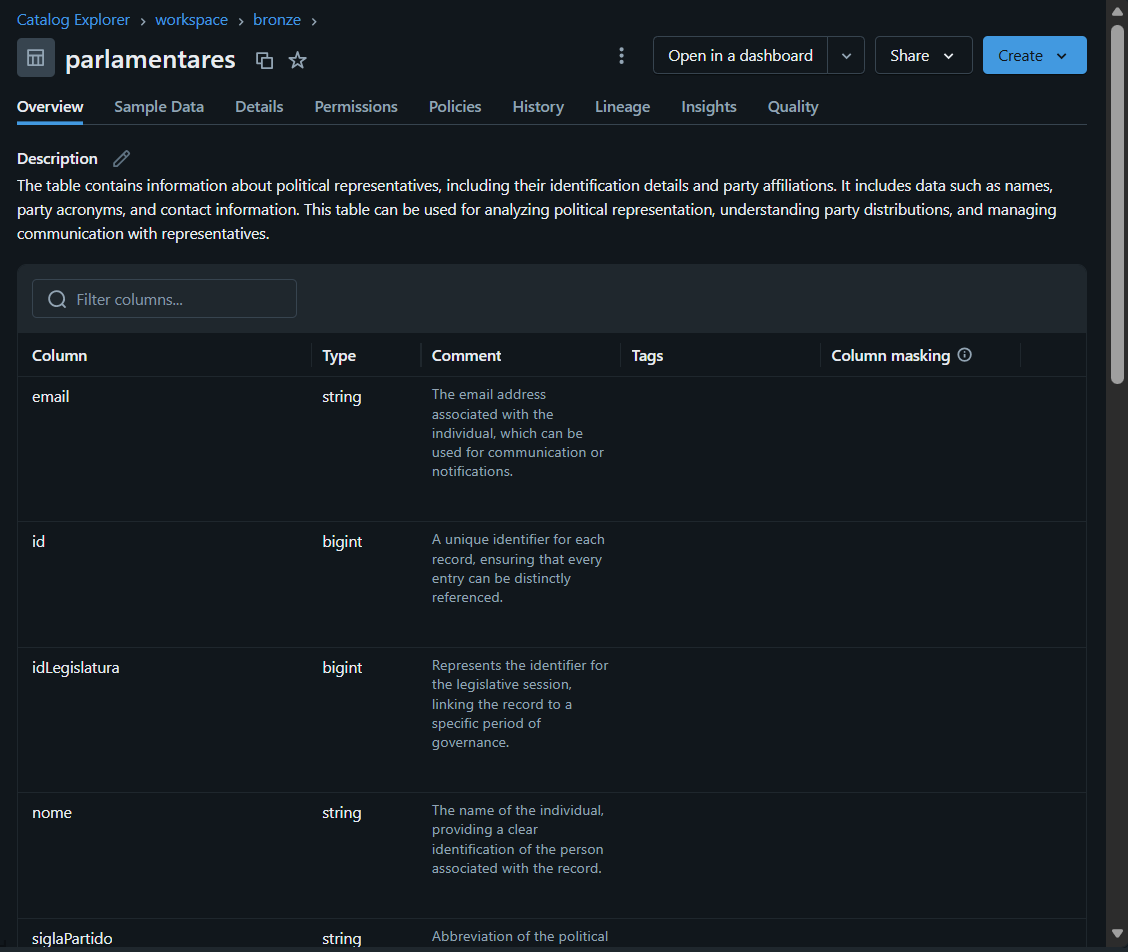

In [0]:
# Printa imagem na tela
caminho_imagem_parlamentares = "/Workspace/Users/vmaquino77@gmail.com/pucrio-mvp-engenharia-dados/fotos/bronze_parlamentares_databricks.png"
imagem_parlamentares = Image.open(caminho_imagem_parlamentares)
display(imagem_parlamentares)

## Emendas 

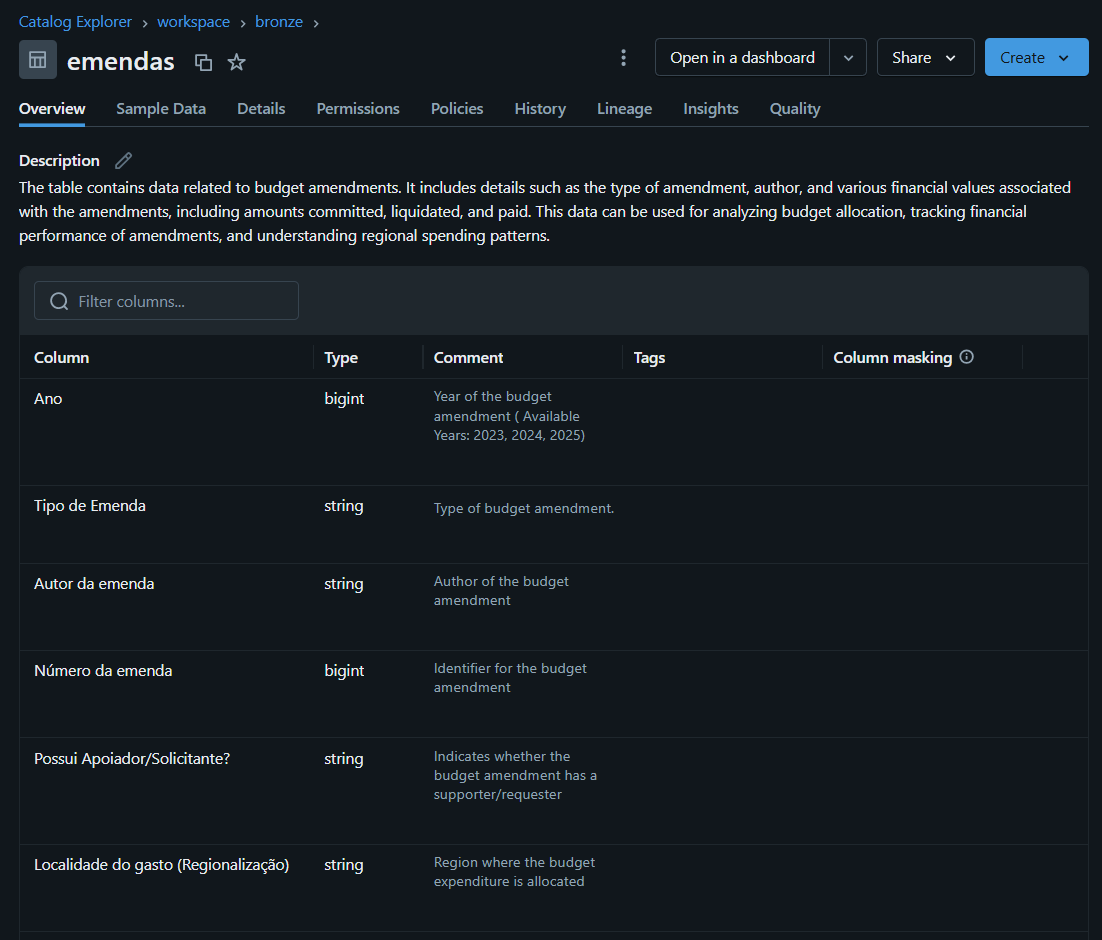

In [0]:
# Printa imagem na tela
caminho_imagem_emendas = "/Workspace/Users/vmaquino77@gmail.com/pucrio-mvp-engenharia-dados/fotos/bronze_emendas_databricks.png"
imagem_emendas = Image.open(caminho_imagem_emendas)
display(imagem_emendas)